# Working with Missing Data

**Utilizing the California Housing dataset**

In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load in the dataset
california = datasets.fetch_california_housing()
print(california.data.shape)

(20640, 8)


In [3]:
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
# Convert the matrix to pandas
cal = pd.DataFrame(california.data)
cal.columns = california.feature_names
cal['MedInc'] = california.target
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
feature_names = cal.columns[1:].values
label_name = cal.columns[0]
print(f"Features: {feature_names}")
print(f"Label: {label_name}")

Features: ['HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup' 'Latitude'
 'Longitude']
Label: MedInc


## Start by fitting a Linear Regression model to the full dataset

**Create a training and testing split (ex., 70/30-split)**

In [10]:
# Create training and testing sets (cross-validation not needed)
train_set = cal.sample(frac=0.7, random_state=100)
test_set = cal[~cal.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

14448
6192


In [11]:
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8151,2.453,36.0,6.276836,1.039548,444.0,2.508475,33.81,-118.10
53,1.042,52.0,4.075000,1.140000,1162.0,2.905000,37.82,-122.27
3039,1.462,13.0,6.746647,1.062593,2170.0,3.233979,35.37,-119.12
9484,1.542,19.0,6.750000,1.348684,424.0,2.789474,39.31,-123.15
9307,3.242,31.0,4.477459,1.073087,2962.0,2.023224,37.98,-122.52


In [12]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [13]:
# Demonstration of using the row indices above to select consistent records
cal.iloc[train_index].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8151,2.453,36.0,6.276836,1.039548,444.0,2.508475,33.81,-118.10
53,1.042,52.0,4.075000,1.140000,1162.0,2.905000,37.82,-122.27
3039,1.462,13.0,6.746647,1.062593,2170.0,3.233979,35.37,-119.12
9484,1.542,19.0,6.750000,1.348684,424.0,2.789474,39.31,-123.15
9307,3.242,31.0,4.477459,1.073087,2962.0,2.023224,37.98,-122.52


In [14]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 1:].values # returns the data; excluding the target
Y_train = train_set.iloc[:, 0].values # returns the target-only
X_test = test_set.iloc[:, 1:].values # ""
Y_test = test_set.iloc[:, 0].values # ""

In [15]:
def print_model_stats(model, X_train, Y_train, feature_names):
    print(f"Train R2: {model.score(X_train, Y_train)}")
    for feature, coef in zip(feature_names, model.coef_):
        print(f"\tFeature: {feature}, Coef: {round(coef,2)}")        
    print(f"Model Intercept: {model.intercept_}")
    print(f"Model Parameters: {model.get_params()}")   
    
    # Find the variable with the largest "normalized" coefficient value
    # print('The positive(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
    print('The abs(max) coef-value is {}'.format(max(model.coef_, key=abs))) # ABS Max
    # max_var = max(reg.coef_) # Positive Max
    max_var = max(model.coef_, key=abs) # ABS Max
    var_index = model.coef_.tolist().index(max_var)
    print('The variable associated with this coef-value is {}'.format(feature_names[var_index]))

In [16]:
# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, Y_train)
print_model_stats(model=reg, X_train=X_train, Y_train=Y_train, feature_names=feature_names)

Train R2: 0.4021408992488681
	Feature: HouseAge, Coef: 0.01
	Feature: AveRooms, Coef: 0.36
	Feature: AveBedrms, Coef: -1.38
	Feature: Population, Coef: -0.0
	Feature: AveOccup, Coef: -0.0
	Feature: Latitude, Coef: -0.73
	Feature: Longitude, Coef: -0.72
Model Intercept: -59.014861272508604
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
The abs(max) coef-value is -1.381296266178564
The variable associated with this coef-value is AveBedrms


In [17]:
def return_metrics(model, X_test, Y_test, nround=3):
    Y_pred = model.predict(X_test)
    mae = round(mean_absolute_error(Y_test,Y_pred),nround)
    mse = round(mean_squared_error(Y_test,Y_pred),nround)
    rmse_val = round(rmse(Y_test,Y_pred),nround)
    r2 = round(r2_score(Y_test,Y_pred), nround)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse_val}, R2: {r2}")
    return mae, mse, rmse_val, r2

In [18]:
orig_mae, orig_mse, orig_rmse_val, orig_r2 = return_metrics(reg, X_test, Y_test)
res_frame = pd.DataFrame({
    'data':'original',
    'imputation':'none',
    'mae': orig_mae, 
    'mse': orig_mse, 
    'rmse': orig_rmse_val, 
    'R2': orig_r2,
    'mae_diff': np.nan,
    'mse_diff': np.nan,
    'rmse_diff': np.nan,
    'R2_diff': np.nan}, index=[0])
res_frame

MAE: 0.678, MSE: 0.808, RMSE: 0.899, R2: 0.39


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.678,0.808,0.899,0.39,NaN,NaN,NaN,NaN


## Round 1 of Imputation

**Here we can randomly sample the full dataset and replace a single column's values**

In [19]:
cal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [20]:
## Choose a variable to replace
var = 'AveBedrms'

In [21]:
# 25% Nullified not at Random
sum(cal[var] > 1.0995)/len(cal)

0.2500968992248062

In [22]:
in_sample = cal[cal[var] > 1.0995]
in_sample.shape

(5162, 8)

In [23]:
out_sample = cal[~cal.isin(in_sample)].dropna()
out_sample.shape

(15478, 8)

In [24]:
print(out_sample.shape[0] + in_sample.shape[0])
print(cal.shape[0])

20640
20640


#### Stats before and after nullifying

In [25]:
out_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000
mean,2.138273,29.377762,5.218842,1.020622,1463.513115,3.053651,35.561861,-119.581912
std,1.136705,12.222164,1.179026,0.054446,1134.568246,10.044541,2.080276,1.973159
min,0.266000,1.000000,0.846154,0.333333,5.000000,0.970588,32.540000,-124.260000
25%,1.310000,19.000000,4.408637,0.992660,825.000000,2.469555,33.930000,-121.820000
50%,1.875000,30.000000,5.167558,1.028169,1200.000000,2.854323,34.220000,-118.470000
75%,2.713000,37.000000,5.950183,1.059217,1760.000000,3.310223,37.670000,-118.030000
max,5.000010,52.000000,10.370656,1.099490,35682.000000,1243.333333,41.810000,-114.570000


In [26]:
in_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5162.000000,5162.000000,5162.000000,5162.000000,5162.000000,5162.000000,5162.000000,5162.000000
mean,1.859520,26.425804,6.059148,1.324717,1311.426579,3.121642,35.841755,-119.533102
std,1.179872,13.376301,4.447684,0.905483,1118.504226,11.349494,2.282187,2.091731
min,0.149990,1.000000,1.260870,1.099502,3.000000,0.692308,32.550000,-124.350000
25%,0.978250,16.000000,4.537158,1.120518,664.000000,2.313486,33.960000,-121.570000
50%,1.530000,25.000000,5.438661,1.152621,1050.000000,2.701410,34.660000,-118.775000
75%,2.356000,36.000000,6.384640,1.233075,1618.750000,3.187990,37.810000,-117.910000
max,5.000010,52.000000,141.909091,34.066667,16305.000000,599.714286,41.950000,-114.310000


In [27]:
in_sample[var] = np.nan

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
in_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5162.000000,5162.000000,5162.000000,0.0,5162.000000,5162.000000,5162.000000,5162.000000
mean,1.859520,26.425804,6.059148,NaN,1311.426579,3.121642,35.841755,-119.533102
std,1.179872,13.376301,4.447684,NaN,1118.504226,11.349494,2.282187,2.091731
min,0.149990,1.000000,1.260870,NaN,3.000000,0.692308,32.550000,-124.350000
25%,0.978250,16.000000,4.537158,NaN,664.000000,2.313486,33.960000,-121.570000
50%,1.530000,25.000000,5.438661,NaN,1050.000000,2.701410,34.660000,-118.775000
75%,2.356000,36.000000,6.384640,NaN,1618.750000,3.187990,37.810000,-117.910000
max,5.000010,52.000000,141.909091,NaN,16305.000000,599.714286,41.950000,-114.310000


In [29]:
in_sample.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5,2.697,52.0,4.761658,NaN,413.0,2.139896,37.85,-122.25
8,2.267,42.0,4.294118,NaN,1206.0,2.026891,37.84,-122.26
20,1.475,40.0,4.524096,NaN,409.0,2.463855,37.85,-122.27
22,1.139,52.0,5.096234,NaN,1015.0,2.123431,37.84,-122.27
30,1.223,49.0,5.068783,NaN,863.0,2.283069,37.84,-122.28


**Choose an imputation method**

In [30]:
out_sample[var].median()

1.028169014084507

In [31]:
in_sample[var] = in_sample[var].fillna(out_sample[var].median())
in_sample.head()

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5,2.697,52.0,4.761658,1.028169,413.0,2.139896,37.85,-122.25
8,2.267,42.0,4.294118,1.028169,1206.0,2.026891,37.84,-122.26
20,1.475,40.0,4.524096,1.028169,409.0,2.463855,37.85,-122.27
22,1.139,52.0,5.096234,1.028169,1015.0,2.123431,37.84,-122.27
30,1.223,49.0,5.068783,1.028169,863.0,2.283069,37.84,-122.28


In [32]:
in_sample[var].describe()

count    5.162000e+03
mean     1.028169e+00
std      2.220661e-16
min      1.028169e+00
25%      1.028169e+00
50%      1.028169e+00
75%      1.028169e+00
max      1.028169e+00
Name: AveBedrms, dtype: float64

**Rejoin the imputed and original datasets**

In [33]:
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()
imputed_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,2.697,52.0,4.761658,1.028169,413.0,2.139896,37.85,-122.25
6,2.992,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,2.414,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.267,42.0,4.294118,1.028169,1206.0,2.026891,37.84,-122.26
9,2.611,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


**Use the same training and testing indices to fit the model**

In [34]:
train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8151,2.453,36.0,6.276836,1.039548,444.0,2.508475,33.81,-118.10
53,1.042,52.0,4.075000,1.028169,1162.0,2.905000,37.82,-122.27
3039,1.462,13.0,6.746647,1.062593,2170.0,3.233979,35.37,-119.12
9484,1.542,19.0,6.750000,1.028169,424.0,2.789474,39.31,-123.15
9307,3.242,31.0,4.477459,1.073087,2962.0,2.023224,37.98,-122.52


In [35]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 1:].values # returns the data; excluding the target
Y_train = train_set.iloc[:, 0].values # returns the target-only
X_test = test_set.iloc[:, 1:].values # ""
Y_test = test_set.iloc[:, 0].values # ""

**Fit a new model to the imputed dataset**

In [36]:
reg2 = LinearRegression().fit(X_train, Y_train)
print_model_stats(model=reg2, X_train=X_train, Y_train=Y_train, feature_names=feature_names)

Train R2: 0.32637770552796863
	Feature: HouseAge, Coef: 0.0
	Feature: AveRooms, Coef: 0.16
	Feature: AveBedrms, Coef: -0.04
	Feature: Population, Coef: -0.0
	Feature: AveOccup, Coef: -0.0
	Feature: Latitude, Coef: -0.78
	Feature: Longitude, Coef: -0.78
Model Intercept: -64.87324065657128
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
The abs(max) coef-value is -0.7848961459998272
The variable associated with this coef-value is Longitude


In [37]:
mae, mse, rmse_val, r2 = return_metrics(reg2, X_test, Y_test)
temp_frame = pd.DataFrame({
    'data':'25% MNAR',
    'imputation':'Median',
    'mae': mae, 
    'mse': mse, 
    'rmse':rmse_val,
    'R2':r2,
    'mae_diff':mae-orig_mae,
    'mse_diff':mse-orig_mse,
    'rmse_diff':rmse_val-orig_rmse_val,
    'R2_diff':r2-orig_r2
    }, index=[0])
res_frame = pd.concat([res_frame, temp_frame])
res_frame

MAE: 0.717, MSE: 0.989, RMSE: 0.995, R2: 0.253


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.678,0.808,0.899,0.390,NaN,NaN,NaN,NaN
0,25% MNAR,Median,0.717,0.989,0.995,0.253,0.039,0.181,0.096,-0.137


## Round 2 of Imputation (KNN)

In [38]:
in_sample = cal[cal['AveBedrms'] > 1.0995]
in_sample.shape

(5162, 8)

In [39]:
out_sample = cal[~cal.isin(in_sample)].dropna()
out_sample.shape

(15478, 8)

In [40]:
print(out_sample.shape[0] + in_sample.shape[0])
print(cal.shape[0])

20640
20640


In [41]:
in_sample[var] = np.nan

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
in_sample.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5162.000000,5162.000000,5162.000000,0.0,5162.000000,5162.000000,5162.000000,5162.000000
mean,1.859520,26.425804,6.059148,NaN,1311.426579,3.121642,35.841755,-119.533102
std,1.179872,13.376301,4.447684,NaN,1118.504226,11.349494,2.282187,2.091731
min,0.149990,1.000000,1.260870,NaN,3.000000,0.692308,32.550000,-124.350000
25%,0.978250,16.000000,4.537158,NaN,664.000000,2.313486,33.960000,-121.570000
50%,1.530000,25.000000,5.438661,NaN,1050.000000,2.701410,34.660000,-118.775000
75%,2.356000,36.000000,6.384640,NaN,1618.750000,3.187990,37.810000,-117.910000
max,5.000010,52.000000,141.909091,NaN,16305.000000,599.714286,41.950000,-114.310000


In [43]:
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()
imputed_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,2.697,52.0,4.761658,NaN,413.0,2.139896,37.85,-122.25
6,2.992,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,2.414,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.267,42.0,4.294118,NaN,1206.0,2.026891,37.84,-122.26
9,2.611,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [44]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=21, )
imputed_data = imputer.fit_transform(imputed_data)
imputed_data = pd.DataFrame(imputed_data, columns=california.feature_names)

In [45]:
imputed_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.068558,28.639486,5.429000,1.019259,1425.476744,3.070655,35.631861,-119.569704
std,1.153956,12.585558,2.474173,0.049644,1132.462122,10.386050,2.135952,2.003532
min,0.149990,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,1.196000,18.000000,4.440716,0.998463,787.000000,2.429741,33.930000,-121.800000
50%,1.797000,29.000000,5.229129,1.024663,1166.000000,2.818116,34.260000,-118.490000
75%,2.647250,37.000000,6.052381,1.049569,1725.000000,3.282261,37.710000,-118.010000
max,5.000010,52.000000,141.909091,1.099490,35682.000000,1243.333333,41.950000,-114.310000


#### Use the same training and testing indices to fit the model

In [46]:
train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8151,2.453,36.0,6.276836,1.039548,444.0,2.508475,33.81,-118.10
53,1.042,52.0,4.075000,1.033517,1162.0,2.905000,37.82,-122.27
3039,1.462,13.0,6.746647,1.062593,2170.0,3.233979,35.37,-119.12
9484,1.542,19.0,6.750000,0.995947,424.0,2.789474,39.31,-123.15
9307,3.242,31.0,4.477459,1.073087,2962.0,2.023224,37.98,-122.52


In [47]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 1:].values # returns the data; excluding the target
Y_train = train_set.iloc[:, 0].values # returns the target-only
X_test = test_set.iloc[:, 1:].values # ""
Y_test = test_set.iloc[:, 0].values # ""

#### Fit a new model to the imputed dataset

In [48]:
reg3 = LinearRegression().fit(X_train, Y_train)
print_model_stats(model=reg3, X_train=X_train, Y_train=Y_train, feature_names=feature_names)

Train R2: 0.32662108482540664
	Feature: HouseAge, Coef: 0.0
	Feature: AveRooms, Coef: 0.16
	Feature: AveBedrms, Coef: 0.38
	Feature: Population, Coef: -0.0
	Feature: AveOccup, Coef: -0.0
	Feature: Latitude, Coef: -0.78
	Feature: Longitude, Coef: -0.78
Model Intercept: -65.2786492885054
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
The abs(max) coef-value is -0.7847978535729381
The variable associated with this coef-value is Longitude


In [49]:
mae, mse, rmse_val, r2 = return_metrics(reg3, X_test, Y_test)
temp_frame = pd.DataFrame({
    'data':'25% MNAR',
    'imputation':'KNN',
    'mae': mae, 
    'mse': mse, 
    'rmse':rmse_val,
    'R2':r2,
    'mae_diff':mae-orig_mae,
    'mse_diff':mse-orig_mse,
    'rmse_diff':rmse_val-orig_rmse_val,
    'R2_diff':r2-orig_r2
    }, index=[0])
res_frame = pd.concat([res_frame, temp_frame])
res_frame

MAE: 0.717, MSE: 0.988, RMSE: 0.994, R2: 0.254


,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.678,0.808,0.899,0.390,NaN,NaN,NaN,NaN
0,25% MNAR,Median,0.717,0.989,0.995,0.253,0.039,0.181,0.096,-0.137
0,25% MNAR,KNN,0.717,0.988,0.994,0.254,0.039,0.180,0.095,-0.136


# Using scikit example

In [50]:
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [51]:
from sklearn.model_selection import KFold

In [52]:
def get_scores_for_imputer(imputer, model, X_missing, y_missing, scoring = 'neg_mean_squared_error', cv=5):
    estimator = make_pipeline(imputer, model)
    impute_scores = cross_val_score(estimator, X_missing, y_missing, scoring=scoring, cv=cv)
    return impute_scores

def get_impute_zero_score(model, X_missing, y_missing, scoring = 'neg_mean_squared_error', cv=5):
    imputer = SimpleImputer(missing_values=np.nan, add_indicator=True, strategy='constant', fill_value=0)
    zero_impute_scores = get_scores_for_imputer(
        imputer=imputer, model=model, X_missing=X_missing, y_missing=y_missing, scoring=scoring, cv=cv
    )
    return zero_impute_scores.mean(), zero_impute_scores.std()

def get_impute_knn_score(model, X_missing, y_missing, scoring = 'neg_mean_squared_error', cv=5):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(
        imputer=imputer, model=model, X_missing=X_missing, y_missing=y_missing, scoring=scoring, cv=cv
    )
    return knn_impute_scores.mean(), knn_impute_scores.std()

def get_impute_mean(model, X_missing, y_missing, scoring = 'neg_mean_squared_error', cv=5):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(
        imputer=imputer, model=model, X_missing=X_missing, y_missing=y_missing, scoring=scoring, cv=cv
    )
    return mean_impute_scores.mean(), mean_impute_scores.std()

def get_impute_median(model, X_missing, y_missing, scoring = 'neg_mean_squared_error', cv=5):
    imputer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(
        imputer=imputer, model=model, X_missing=X_missing, y_missing=y_missing, scoring=scoring, cv=cv
    )
    return mean_impute_scores.mean(), mean_impute_scores.std()

def get_full_score(model, X_full, y_full, scoring='neg_mean_squared_error', cv=5):
    full_scores = cross_val_score(model, X_full, y_full, scoring=scoring, cv=cv)
    return full_scores.mean(), full_scores.std()

### Original Data

In [53]:
X_full = cal.iloc[:, 1:]
y_full = cal.iloc[:, 0]
print(X_full.shape, y_full.shape)

(20640, 7) (20640,)


### Add Missing Data

In [54]:
in_sample = cal[cal['AveBedrms'] > 1.0995]
in_sample.shape

(5162, 8)

In [55]:
out_sample = cal[~cal.isin(in_sample)].dropna()
out_sample.shape

(15478, 8)

In [56]:
print(out_sample.shape[0] + in_sample.shape[0])
print(cal.shape[0])

20640
20640


In [57]:
in_sample[var] = np.nan

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
missing_data = pd.concat([in_sample, out_sample])
missing_data = missing_data.sort_index()
missing_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,2.697,52.0,4.761658,NaN,413.0,2.139896,37.85,-122.25
6,2.992,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,2.414,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.267,42.0,4.294118,NaN,1206.0,2.026891,37.84,-122.26
9,2.611,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [59]:
X_missing = missing_data.iloc[:, 1:].values
y_missing = missing_data.iloc[:, 0].values

### Various Imputed Scores

In [60]:
def perform_all_analysis(scoring):
    model = LinearRegression(normalize=True)

    x_labels = ['Full data', 'Zero imputation', 'KNN Imputation', 'Mean Imputation', 'Median Imputation']
    num = len(x_labels)
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    metric_means = np.zeros(num)
    metric_stds = np.zeros(num)

    # Original
    metric_means[0], metric_stds[0] = get_full_score(model, X_full, y_full, scoring=scoring, cv=cv)

    # Various Imputed
    metric_means[1], metric_stds[1] = get_impute_zero_score(model, X_missing, y_missing, scoring=scoring, cv=cv)
    metric_means[2], metric_stds[2] = get_impute_knn_score(model, X_missing, y_missing, scoring=scoring, cv=cv)
    metric_means[3], metric_stds[3] = get_impute_mean(model, X_missing, y_missing, scoring=scoring, cv=cv)
    metric_means[4], metric_stds[4] = get_impute_median(model, X_missing, y_missing, scoring=scoring, cv=cv)

    print(f"Mean Metric Values: {metric_means}, Std Dev of Metric: {metric_stds}")

    ## Plot Data
    xval = np.arange(num)

    colors = ['r', 'g', 'b', 'orange', 'black']

    # plot results
    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(121)
    for j in xval:
        ax1.barh(j, metric_means[j], xerr=metric_stds[j], color=colors[j], alpha=0.6, align='center')

    ax1.set_title(f'Imputation Techniques | Metric: {scoring}')
    ax1.set_yticks(xval)
    ax1.set_xlabel(scoring)
    ax1.invert_yaxis()
    ax1.set_yticklabels(x_labels)

    plt.show()
    
    return metric_means, metric_stds

Mean Metric Values: [-0.81723216 -0.92887607 -0.92862265 -0.92887607 -0.92887607], Std Dev of Metric: [0.03543389 0.0291951  0.02914652 0.0291951  0.0291951 ]


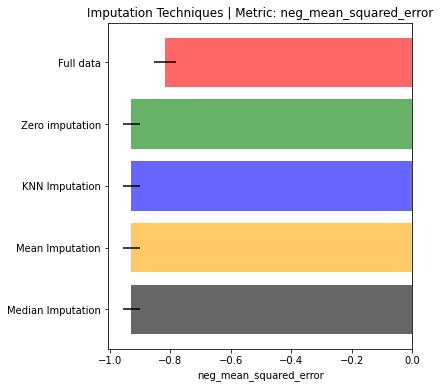

Mean Metric Values: [-0.90379834 -0.96366189 -0.96353077 -0.96366189 -0.96366189], Std Dev of Metric: [0.01951194 0.01522624 0.01520213 0.01522624 0.01522624]


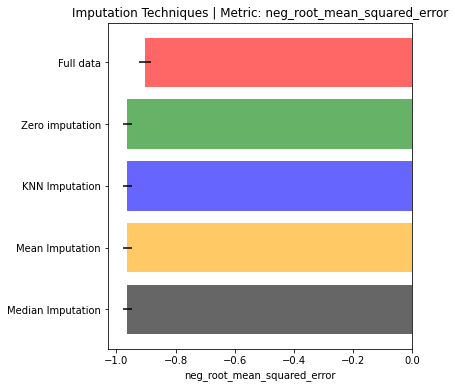

Mean Metric Values: [-0.68183741 -0.72252395 -0.72244713 -0.72252395 -0.72252395], Std Dev of Metric: [0.00693352 0.01026593 0.01035667 0.01026593 0.01026593]


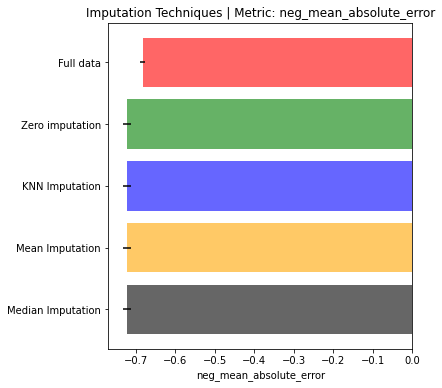

Mean Metric Values: [0.38617075 0.30235608 0.30254518 0.30235608 0.30235608], Std Dev of Metric: [0.02364216 0.0152221  0.01522821 0.0152221  0.0152221 ]


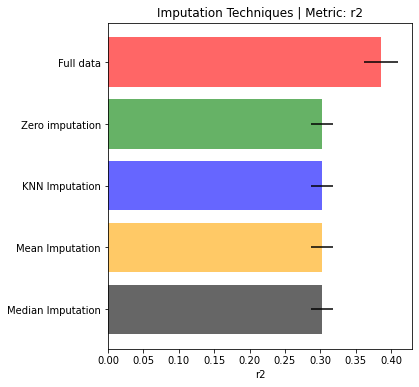

(array([0.38617075, 0.30235608, 0.30254518, 0.30235608, 0.30235608]),
 array([0.02364216, 0.0152221 , 0.01522821, 0.0152221 , 0.0152221 ]))

In [61]:
perform_all_analysis(scoring = 'neg_mean_squared_error')
perform_all_analysis(scoring = 'neg_root_mean_squared_error')
perform_all_analysis(scoring = 'neg_mean_absolute_error')
perform_all_analysis(scoring = 'r2')